In [1]:
!pip install seaborn


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
from tabulate import tabulate

In [17]:
df = pd.read_csv('D:/Semester 3/Data Mining/heart_disease_uci.csv')

In [58]:
display(df.head())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [23]:
display(df.tail())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [25]:
display(df.isnull())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
916,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True,False
917,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
918,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True,False


In [27]:
display(df.isnull)

<bound method DataFrame.isnull of       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  Fal

In [64]:
!pip install scipy

                Mean Median Mode     Std Dev      Variance  Skewness  Kurtosis
id             460.5  460.5  NaN  265.725422       70610.0       0.0 -1.200003
age         53.51087   54.0  NaN    9.424685     88.824691 -0.195674 -0.387367
sex              NaN    NaN  NaN         NaN           NaN       NaN       NaN
dataset          NaN    NaN  NaN         NaN           NaN       NaN       NaN
cp               NaN    NaN  NaN         NaN           NaN       NaN       NaN
trestbps  132.132404  130.0  NaN    19.06607    363.515007       NaN       NaN
chol      199.130337  223.0  NaN   110.78081  12272.387943       NaN       NaN
fbs              NaN    NaN  NaN         NaN           NaN       NaN       NaN
restecg          NaN    NaN  NaN         NaN           NaN       NaN       NaN
thalch    137.545665  140.0  NaN   25.926276    672.171813       NaN       NaN
exang            NaN    NaN  NaN         NaN           NaN       NaN       NaN
oldpeak     0.878788    0.5  NaN    1.091226      1.

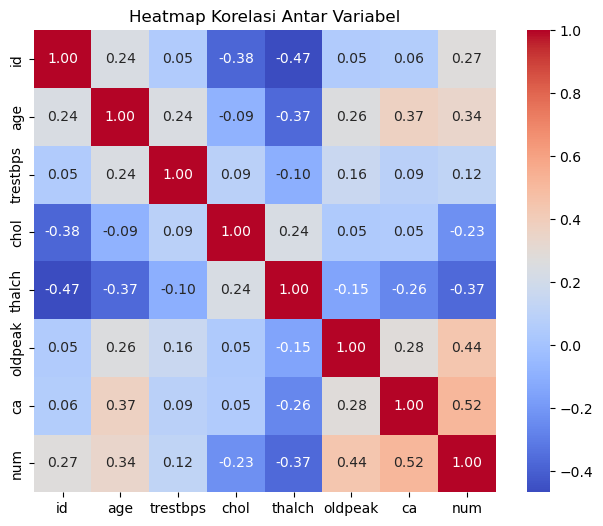

In [94]:
numeric_df = df.select_dtypes(include=[np.number])

def calculate_statistics(df):
    stats = pd.DataFrame(index=df.columns, columns=['Mean', 'Median', 'Mode', 'Std Dev', 'Variance', 'Skewness', 'Kurtosis'])

    
    
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            stats.loc[col, 'Mean'] = df[col].mean()
            stats.loc[col, 'Median'] = df[col].median()
        
            stats.loc[col, 'Std Dev'] = df[col].std()
            stats.loc[col, 'Variance'] = df[col].var()
            stats.loc[col, 'Skewness'] = skew(df[col])
            stats.loc[col, 'Kurtosis'] = kurtosis(df[col])

    return stats

# Menghitung dan menampilkan statistik
statistics = calculate_statistics(df)
print(statistics)

correlation_matrix = numeric_df.corr()
print("\nMatriks Korelasi:\n", correlation_matrix)

# Plot heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True, fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

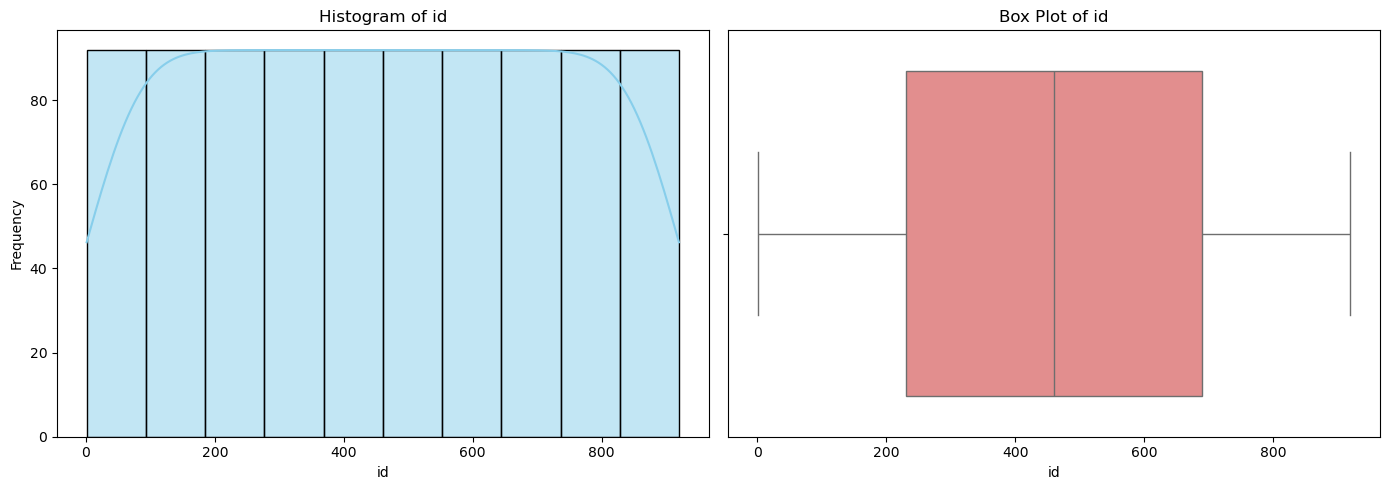

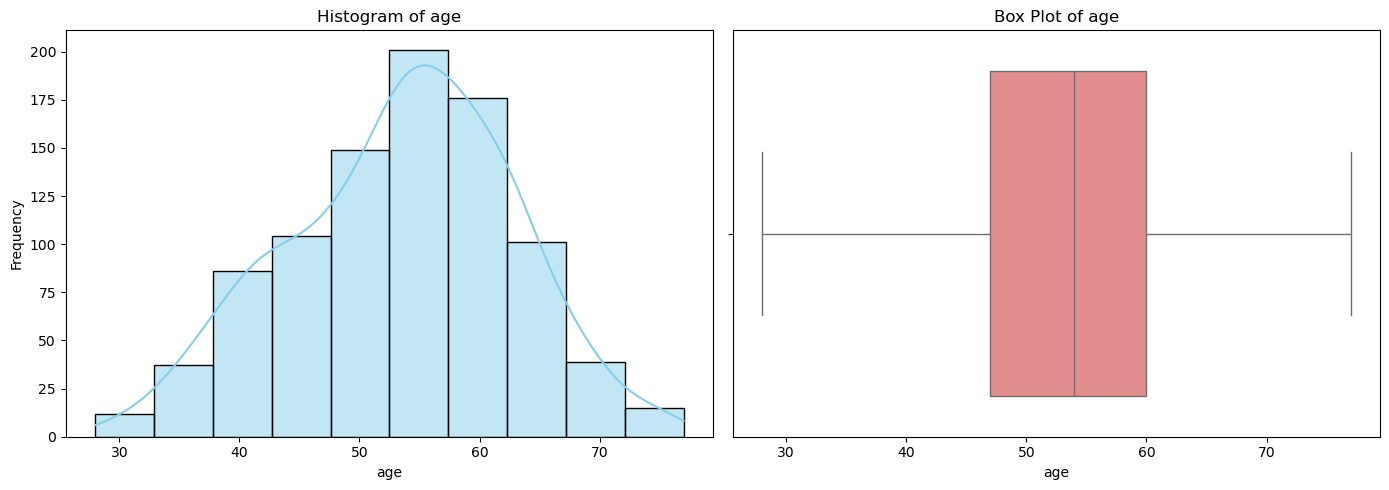

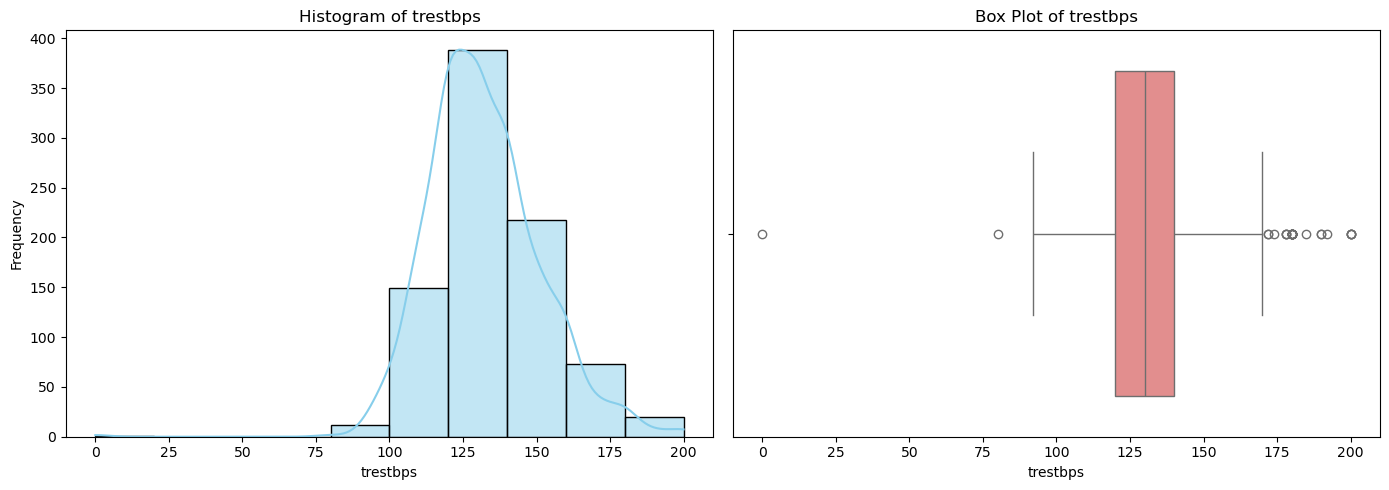

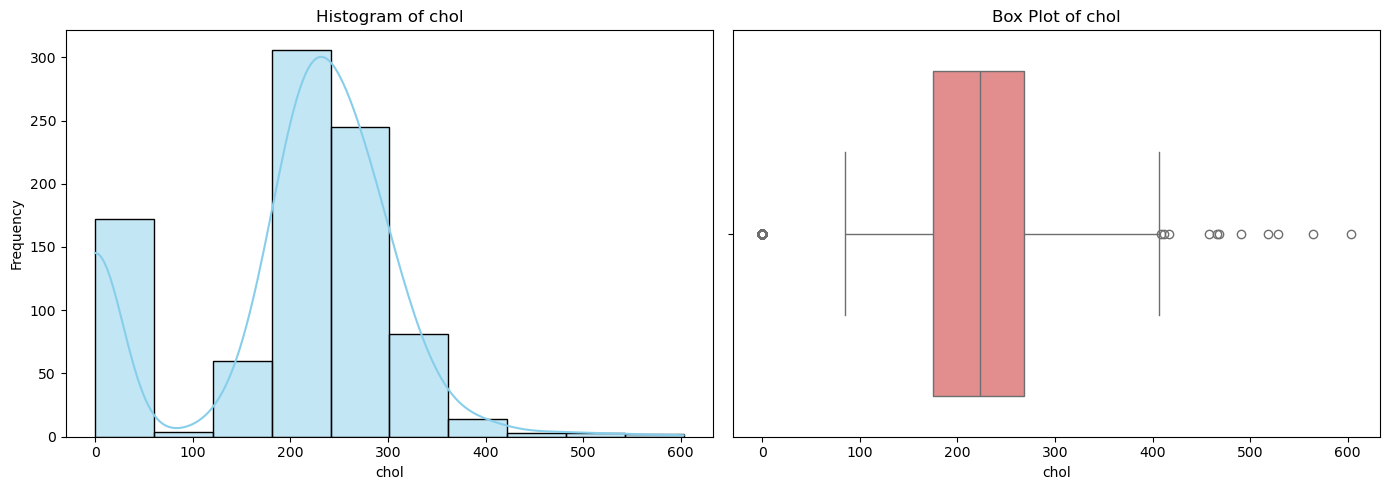

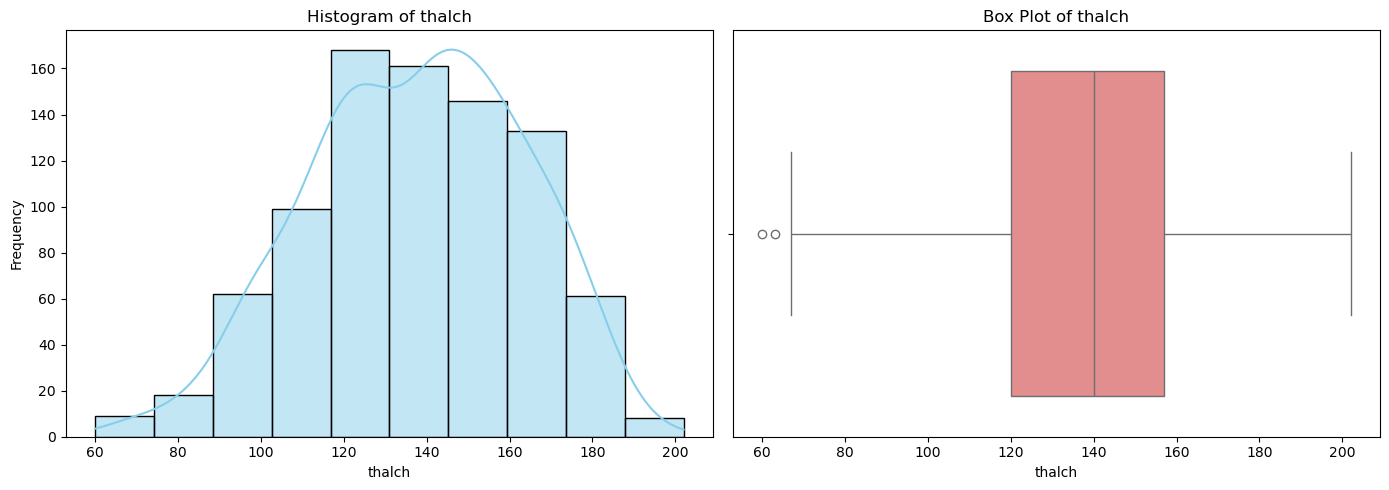

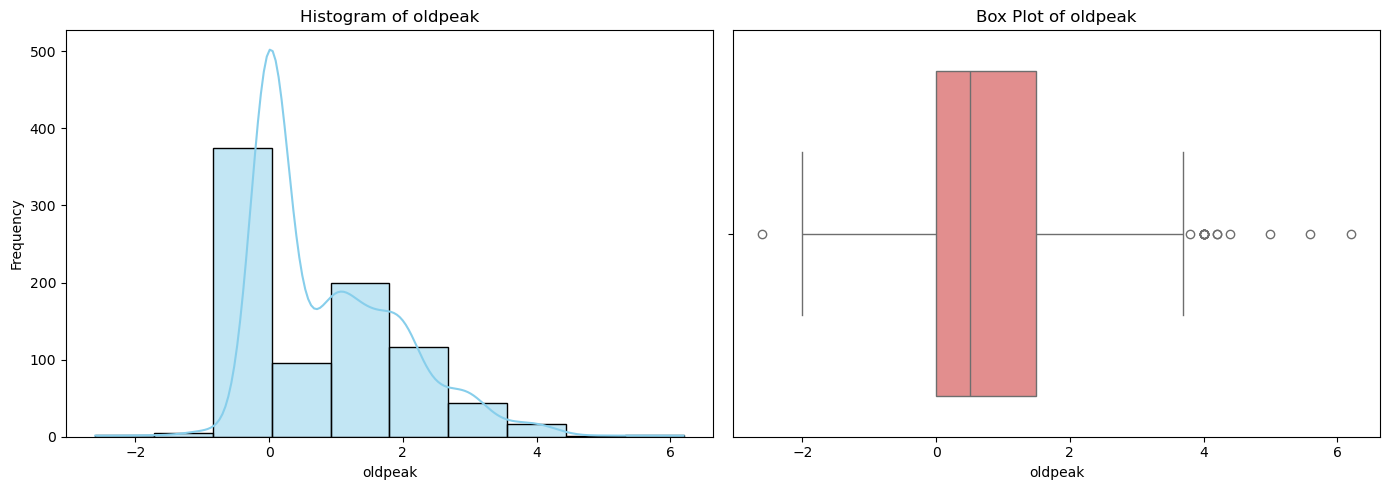

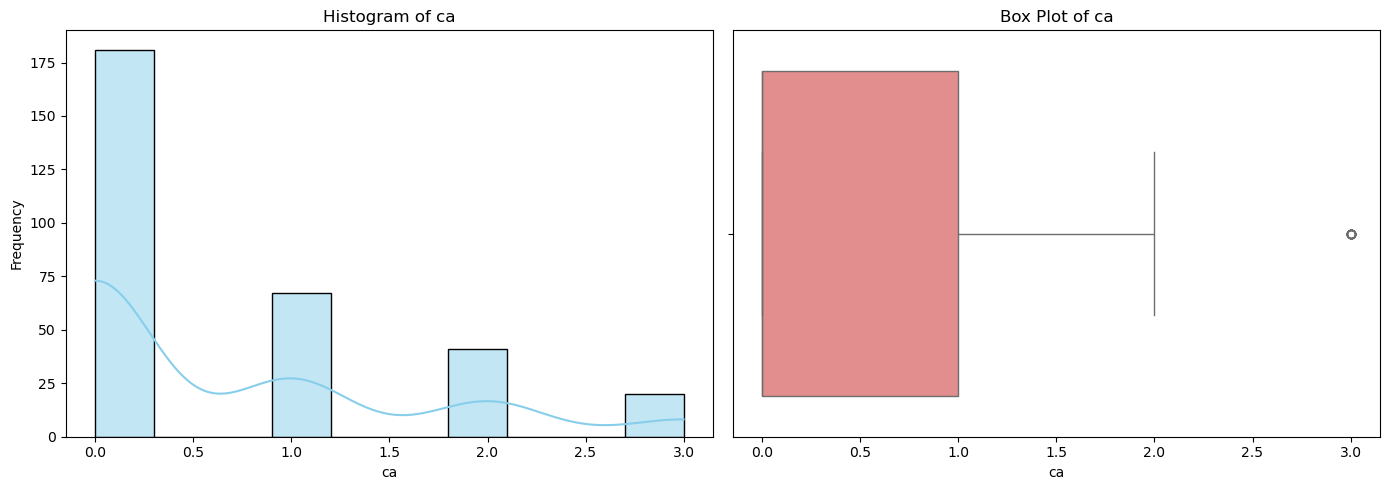

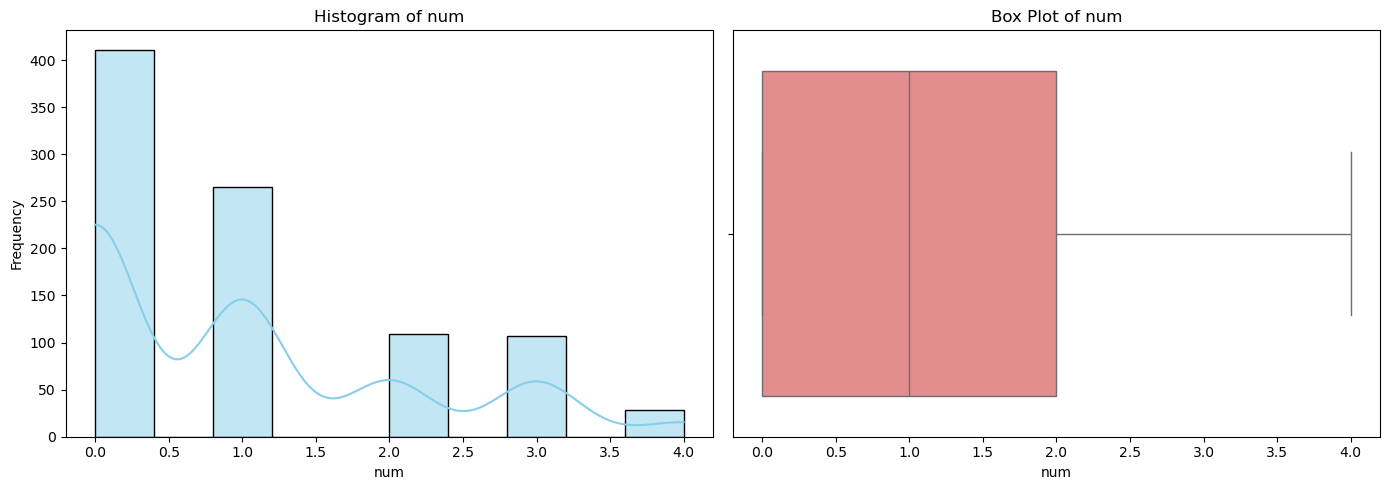

In [96]:
for col in numeric_df.columns:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numeric_df[col], kde=True, bins=10, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=numeric_df[col], color='lightcoral')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

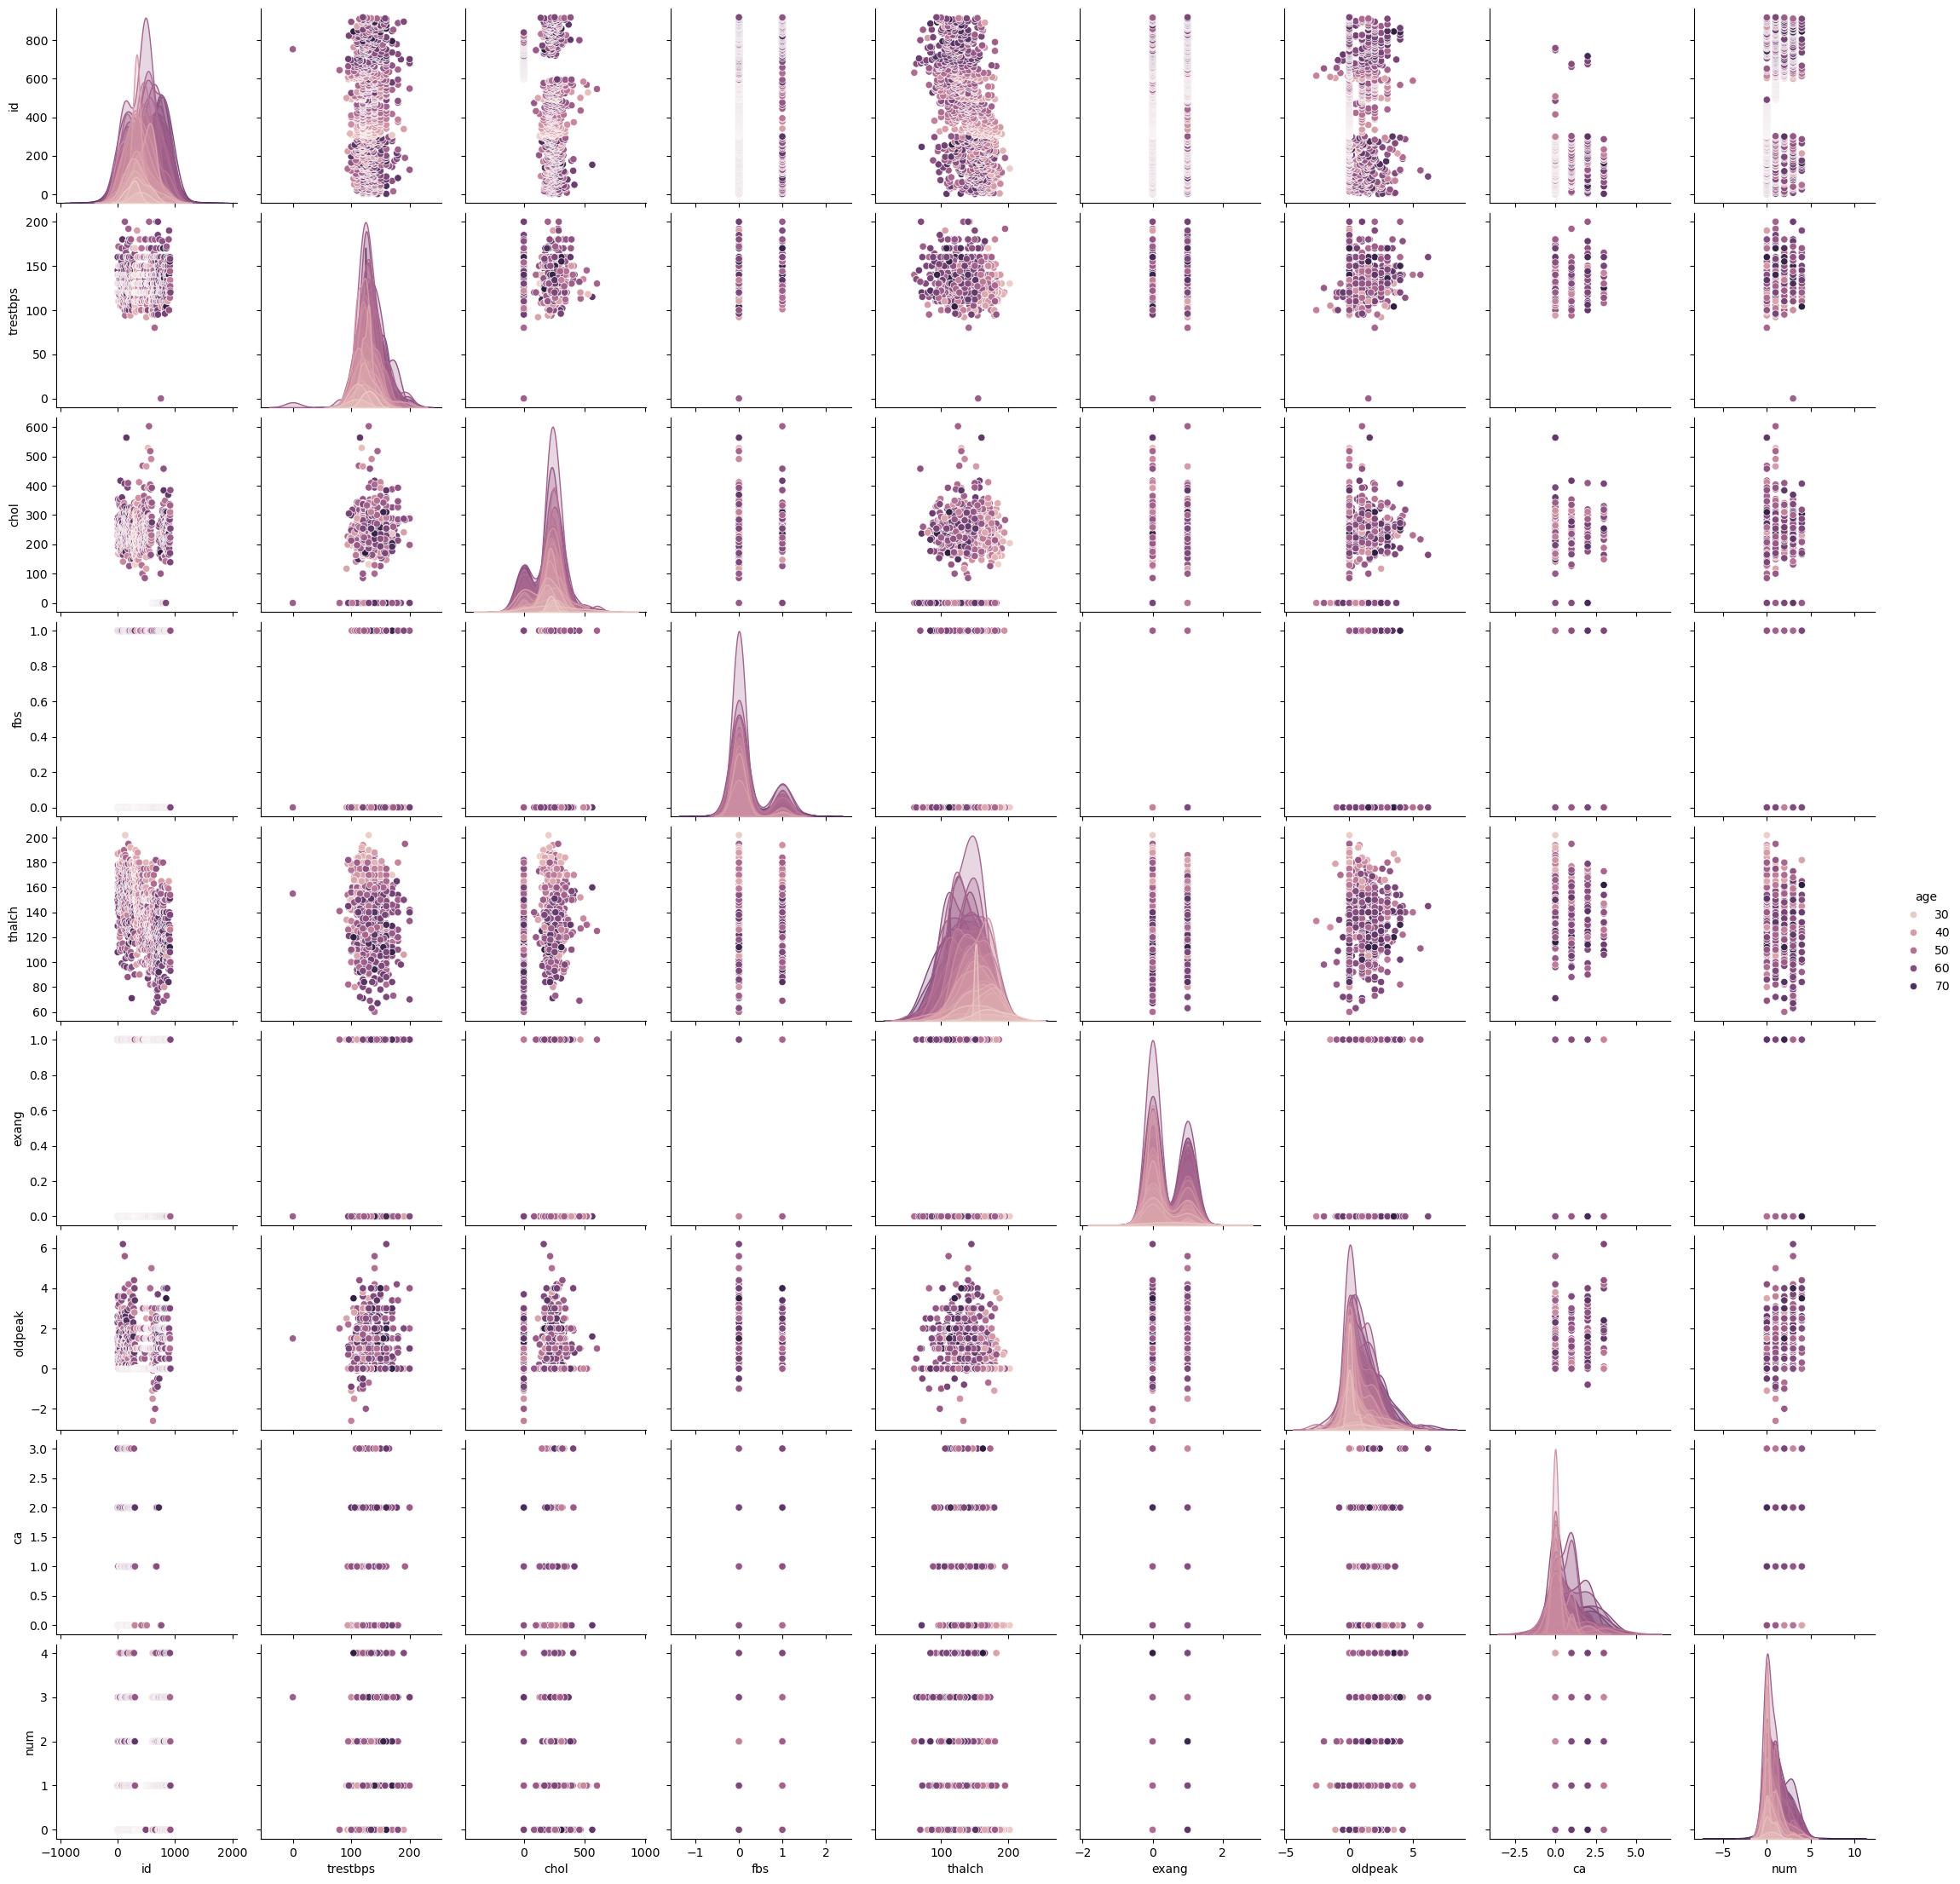

In [19]:
sns.pairplot(df, hue ='age')
plt.show

In [9]:
!pip install tabulate

In [21]:
print ('Berdasarkan eksplorasi awal data dari file yang Anda berikan, berikut adalah laporan singkat mengenai hasil analisis data:')
print ('1.Struktur Data')
print ('Kolom berisi informasi tentang pasien seperti age, sex, trestbps , chol, dan lainnya, termasuk hasil diagnosis.Terdapat berbagai tipe data: numerik dan kategorikal ')
print ('')
print ('2.Missing Values')
print ('Beberapa kolom memiliki missing values yang signifikan:')
print ('-trestbps (tekanan darah): 59 missing values.')
print ('-chol (kolesterol): 30 missing values.')
print ('-thalch (detak jantung maksimum): 55 missing values.')
print ('-oldpeak (depresi ST): 62 missing values.')
print ('-slope, ca, dan thal memiliki missing values yang sangat tinggi, khususnya ca (611 missing values) dan thal (486 missing values).')
print ('')
print ('3. Distribusi Tidak Normal')
print ('-Variabel numerik seperti age, trestbps, dan chol kemungkinan memiliki distribusi yang tidak normal, terutama jika ada skewness yang tinggi atau outliers.')
print ('-Akan diperlukan analisis lebih lanjut seperti histogram dan box plot untuk mengonfirmasi adanya distribusi yang tidak normal.')
print ('')
print ('4. Korelasi Antar Variabel')
print ('-Heatmap korelasi menunjukkan adanya beberapa variabel yang berkorelasi kuat, namun belum secara detail diidentifikasi variabel mana saja.')
print ('-Scatter plot untuk pasangan dengan korelasi tinggi harus diselidiki untuk mengonfirmasi hubungan linier yang kuat.')
print ('')
print ('5. Outliers')
print ('-Dari statistik awal, kemungkinan adanya outliers pada kolom seperti chol dan trestbps, yang dapat menyebabkan deviasi tinggi.')
print ('-Box plot akan membantu mengidentifikasi outliers yang signifikan dalam data.')
print ('')
print ('6. Penemuan yang signifakan')
print ('-Distribusi: Ada indikasi bahwa distribusi variabel numerik mungkin tidak normal dan memiliki skewness, sehingga uji normalitas diperlukan.')
print ('-Korelasi Kuat: Beberapa pasangan variabel menunjukkan korelasi yang kuat, yang penting untuk diperhatikan dalam model prediksi atau analisis regresi.')
print ('-Missing Values: Beberapa kolom dengan missing values yang tinggi perlu diproses dengan imputation atau metode lainnya untuk menjaga integritas data.')
print ('')
print ('')
print ('')
print ('')
print ('')
print ('')
print ('')
print ('')
print ('')
print ('')
print ('')
print ('')
print ('')
print ('')
print ('')

Berdasarkan eksplorasi awal data dari file yang Anda berikan, berikut adalah laporan singkat mengenai hasil analisis data:
1.Struktur Data
Kolom berisi informasi tentang pasien seperti age, sex, trestbps , chol, dan lainnya, termasuk hasil diagnosis.Terdapat berbagai tipe data: numerik dan kategorikal 

2.Missing Values
Beberapa kolom memiliki missing values yang signifikan:
-trestbps (tekanan darah): 59 missing values.
-chol (kolesterol): 30 missing values.
-thalch (detak jantung maksimum): 55 missing values.
-oldpeak (depresi ST): 62 missing values.
-slope, ca, dan thal memiliki missing values yang sangat tinggi, khususnya ca (611 missing values) dan thal (486 missing values).

3. Distribusi Tidak Normal
-Variabel numerik seperti age, trestbps, dan chol kemungkinan memiliki distribusi yang tidak normal, terutama jika ada skewness yang tinggi atau outliers.
-Akan diperlukan analisis lebih lanjut seperti histogram dan box plot untuk mengonfirmasi adanya distribusi yang tidak normal.

4